# Boston Housing DataSet

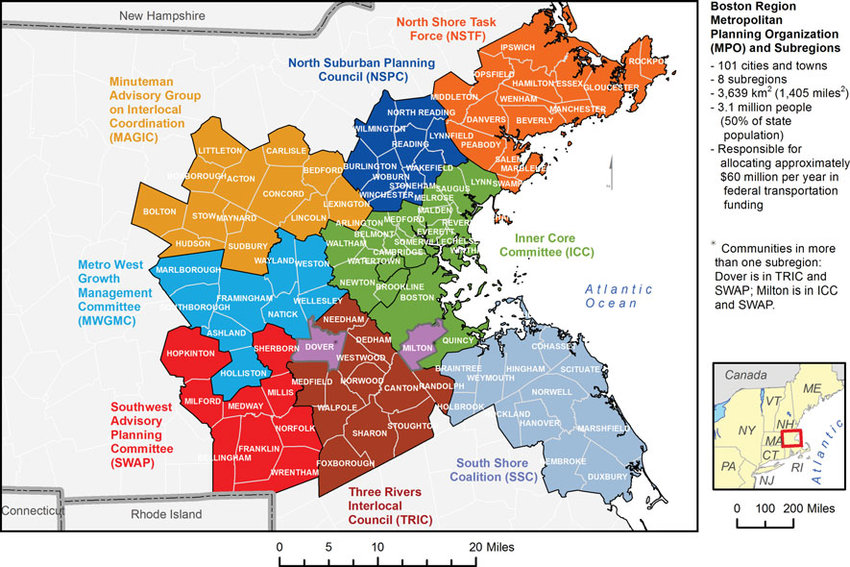

In [10]:
#importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
# For t-tests and ANOVA.
import scipy.stats as stats

In [11]:
%matplotlib inline

In [12]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [13]:
#importing the dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Describe the Dataset

In [14]:
#take a look at the datset keys
#we can see the dataset has a number of keys which correspond to the data, target, features and a description
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
#Lets take a look at each of the keys in turn starting with a description of the dataset
#We can see the various data points which are contained in the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [17]:
#view each of the keys in turn 
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [18]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [19]:
#Create a dataframe from the data set and add the feature names as column labels. 
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [20]:
#Lets take a look at the shape of the dataset
#The data set contains 506 rows and 13 columns
boston.data.shape

(506, 13)

In [21]:
#Check the data set for any null values
#We can see there are no blank fields in the dataset which may effect the statistics
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [22]:
#take a look at the first 5 rows in the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
#take a look at the last 5 rows in the dataset
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [24]:
# we can see there is no Proce column as this is contained in the target variable
#Lets add the column to the dataset
df['MEDV'] = boston.target
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [25]:
#Show the maximum price
df['MEDV'].max()

50.0

In [26]:
#show the minimum price
df['MEDV'].min()

5.0

In [27]:
#Print a description of the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


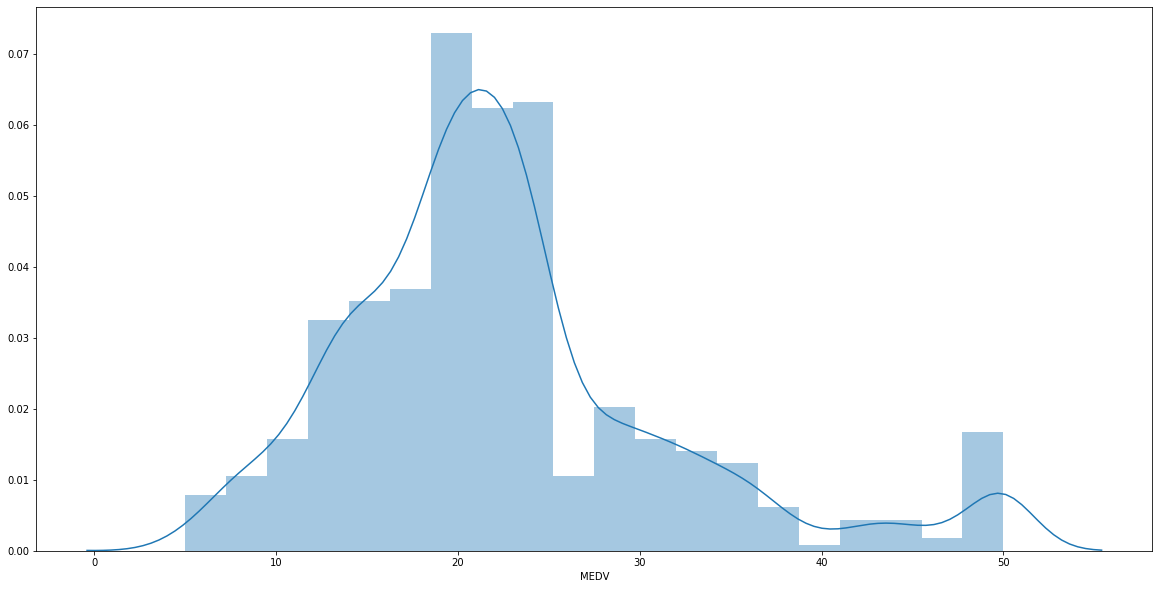

In [28]:
#Lets plot some of the statistic contained in the data set
#The median value of properties is normally distributed except for a few outliers represented by the bell shaped curve. 
sns.distplot(df['MEDV'], bins=20)
plt.show()

In [29]:
#lets create a subset of data to make plotting graphs more legible
#CRIM per capita cime rate by town
#RM average number of rooms per dwelling
#B proportion of blacks by town
#MEDV median value of owner ooccupied homes
cols = ['CRIM', 'RM', 'B', 'MEDV', 'LSTAT']

In [30]:
df[cols].head()

,CRIM,RM,B,MEDV,LSTAT
0,0.00632,6.575,396.90,24.0,4.98
1,0.02731,6.421,396.90,21.6,9.14
2,0.02729,7.185,392.83,34.7,4.03
3,0.03237,6.998,394.63,33.4,2.94
4,0.06905,7.147,396.90,36.2,5.33


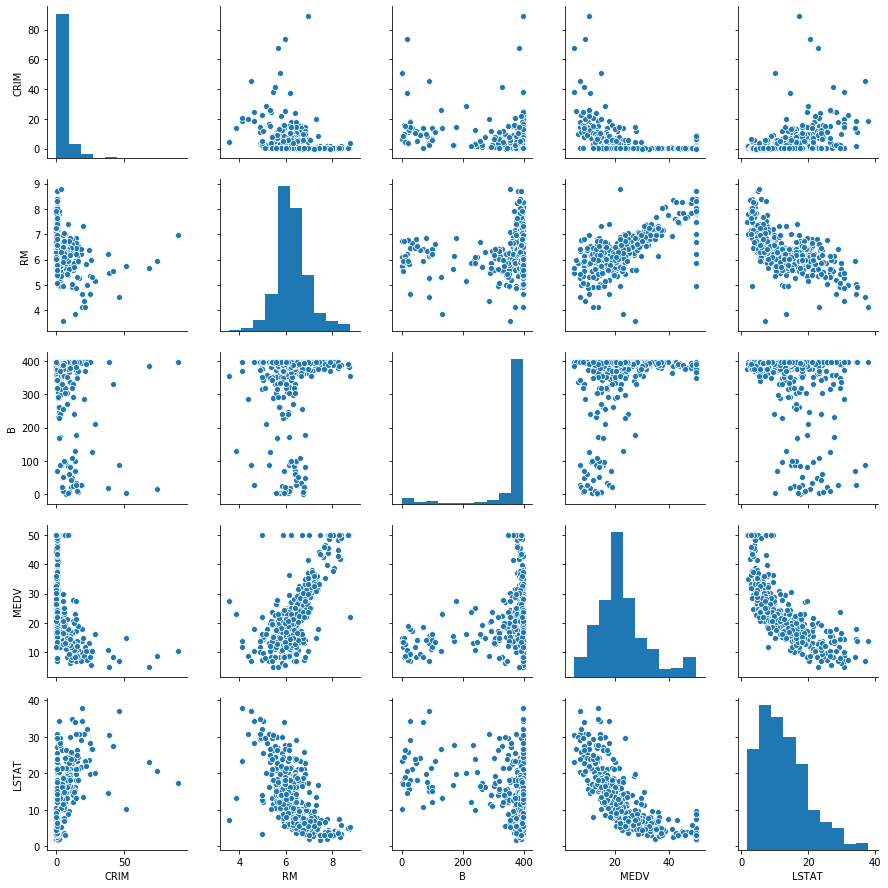

In [31]:
#plot the subset of data to identify any patterns
sns.pairplot(df[cols])

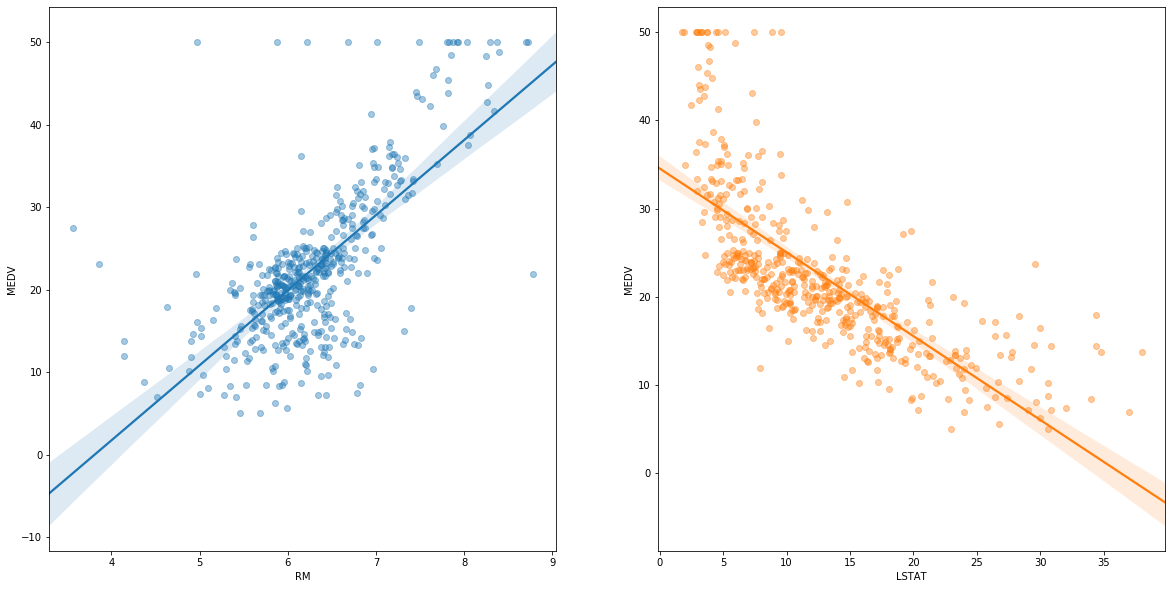

In [32]:
#Lets compare the house prices against some of the subset of features
fig, ax = plt.subplots(1, 2)
sns.regplot('RM', 'MEDV', df, ax=ax[0],
scatter_kws={'alpha': 0.4})
sns.regplot('LSTAT', 'MEDV', df, ax=ax[1],
scatter_kws={'alpha': 0.4}) 
 

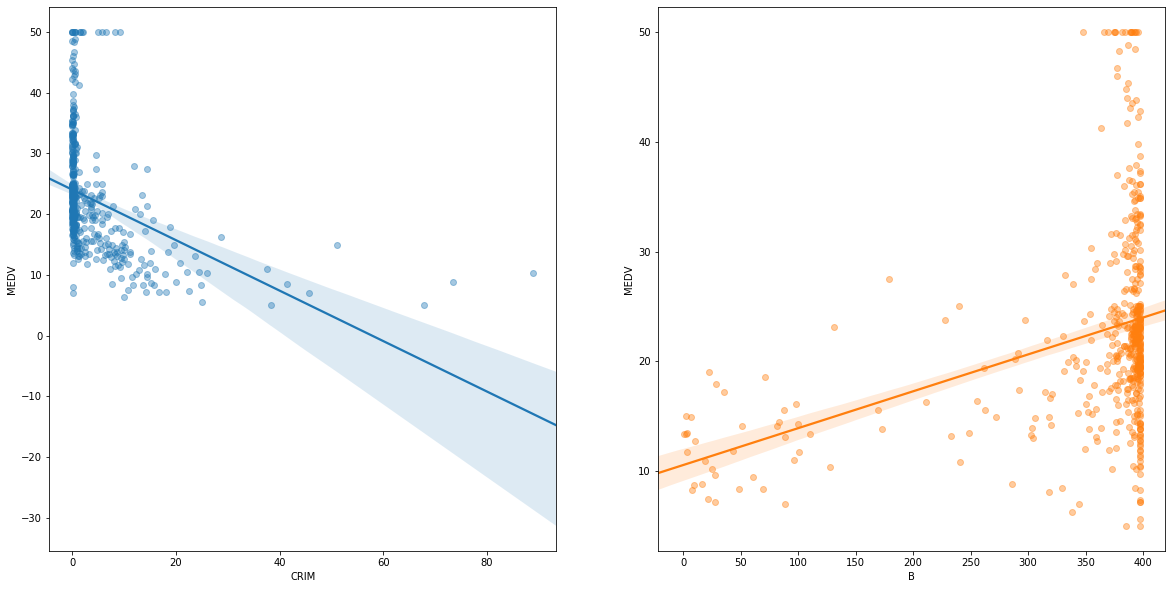

In [33]:
#Lets compare the house prices against some of the subset of features
fig, ax = plt.subplots(1, 2)
sns.regplot('CRIM', 'MEDV', df, ax=ax[0],
scatter_kws={'alpha': 0.4})
sns.regplot('B', 'MEDV', df, ax=ax[1],
scatter_kws={'alpha': 0.4})

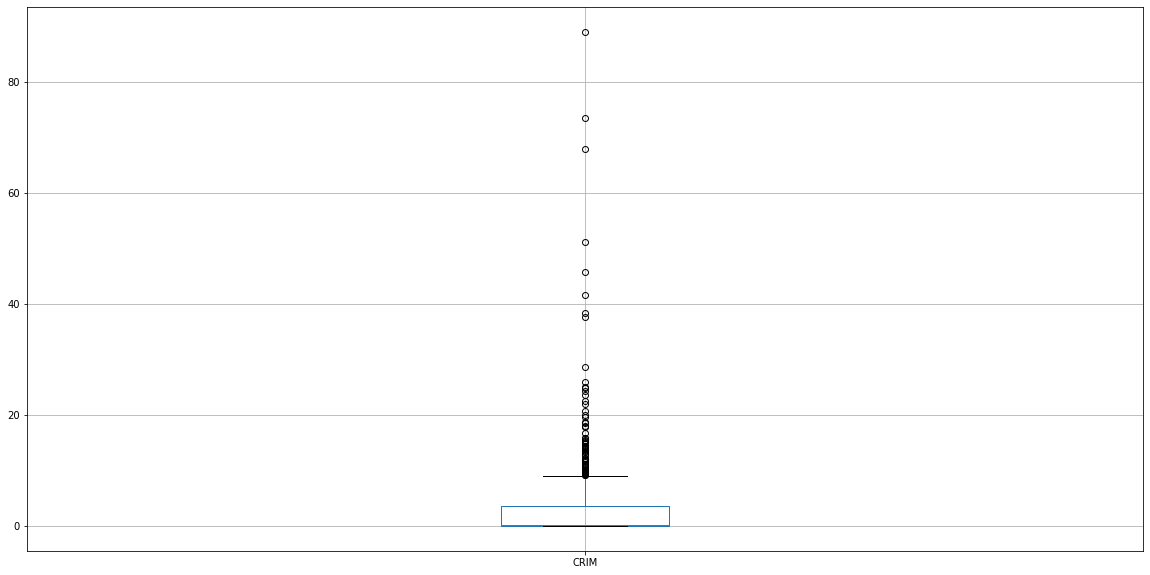

In [34]:
#Lets tak a look at a boxblot for the CRIM statistic
df.boxplot(column='CRIM', sym='o', return_type='axes')

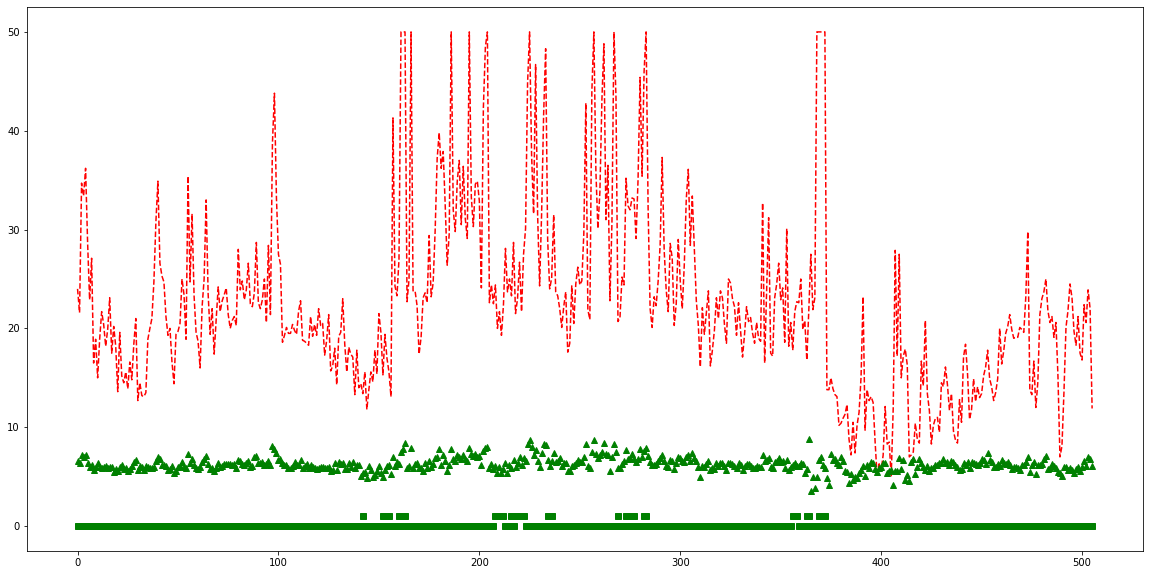

In [35]:
#Plot multiple data points  
CHAS = df.CHAS.values
MEDV = df.MEDV.values
RM = df.RM.values
plt.plot(MEDV, 'r--', CHAS, 'gs', RM, 'g^')

# INFER

Use inferential statistics to analyse whether there is a significant difference in median house prices
between houses that are along the Charles river and those that aren’t.

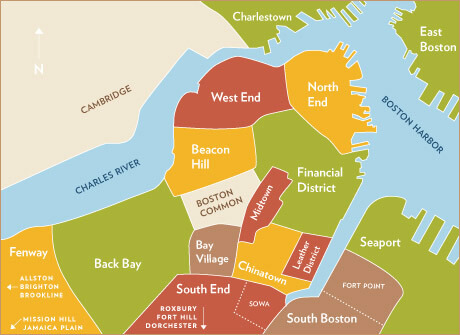

In [36]:
#Lets take a look at the correlations between various data points in the Boston Housing dataset
#we can see here that the correlation between proximity to the Charles River and the Median price is 0.175260 
#which indicates no real correlation between these data points
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


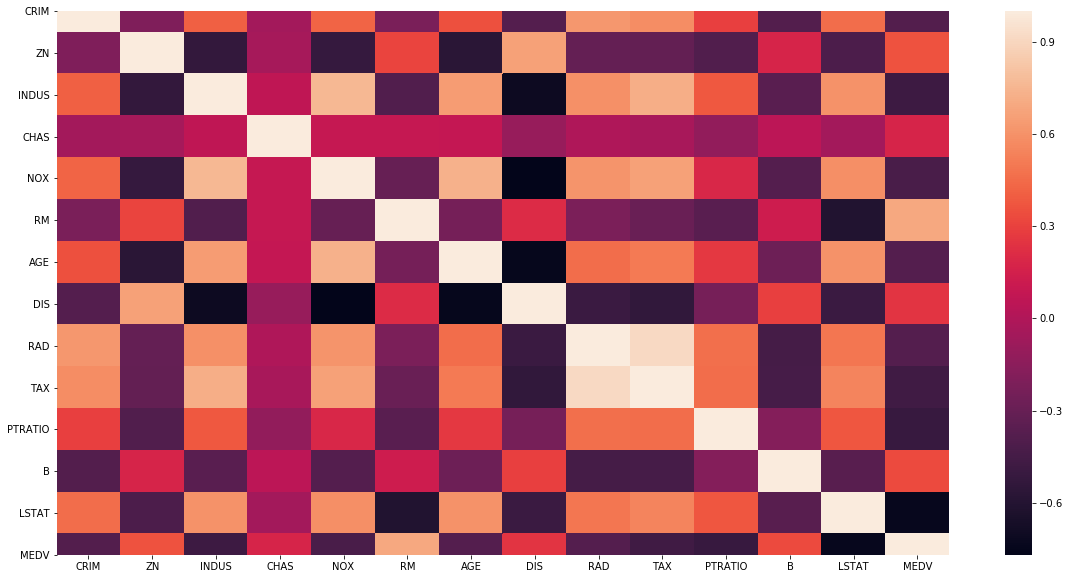

In [37]:
#We can visually display these correlations in a heatmap
#Again we can see the color code indicatinf no strong positive or negative correlation between the data points
hm = sns.heatmap(df.corr())

In [38]:
#lets take a look at he pair plots for these data points. 
cols = ['CHAS', 'MEDV']

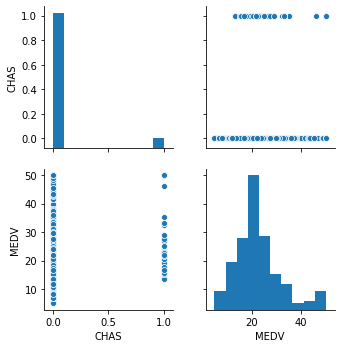

In [39]:
sns.pairplot(df[cols])

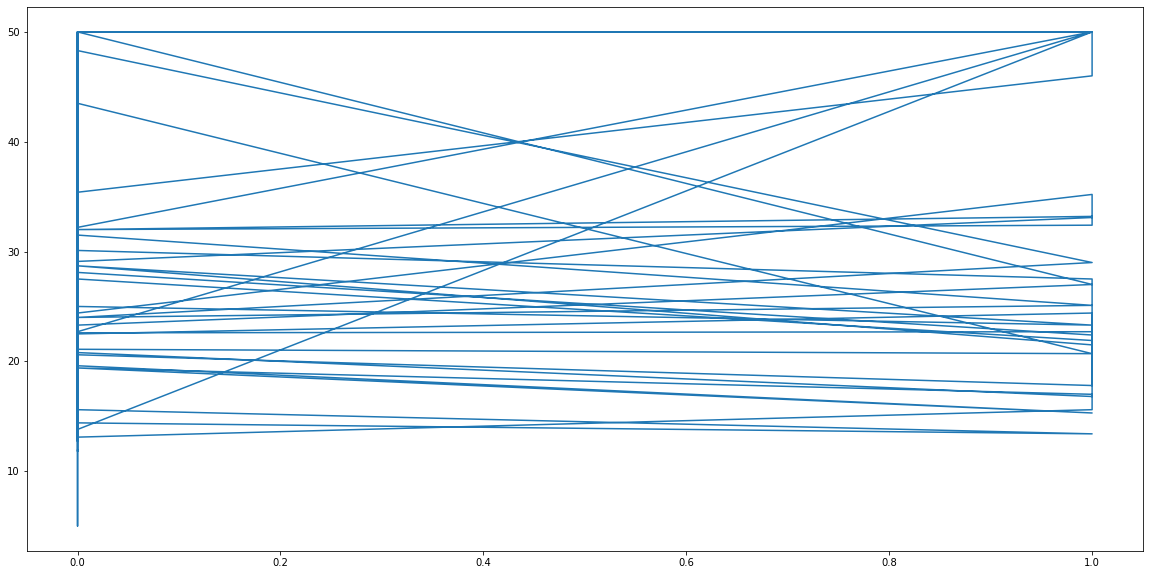

In [40]:
#plotting the values on a line graph looks a bit messy. We would expect to see a more linear output if there was a direct correlation
#Plotting house values for property which borders the Charles river and those which do not seperately might make the output clearer
#given the CHAS has a value of 0 or 1
CHAS = df.CHAS.values
MEDV = df.MEDV.values
plt.plot(CHAS, MEDV)


In [41]:
#Check if the data looks like our plot
#here we can see a majority of houses do not border the Charles Riveer ie (0) value
df.CHAS.values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0.

In [42]:
#lets select all property which borders the river
x1 = df.loc[df['CHAS'] == 1].MEDV.values

In [43]:
#lets view all the property which does not border the Charles River 
y1 = df.loc[df['CHAS'] == 0].MEDV.values

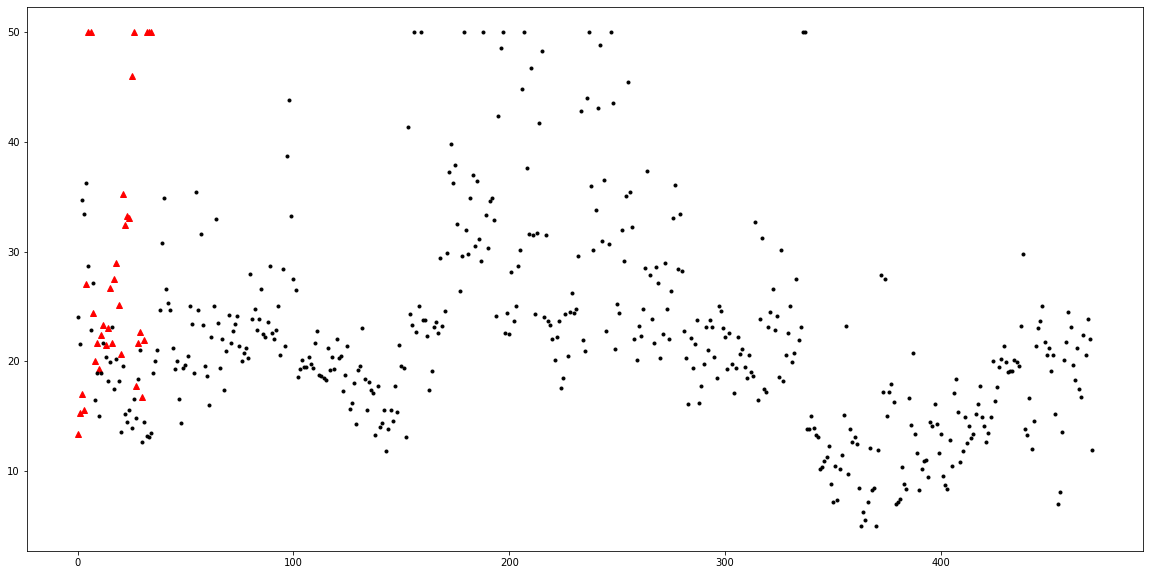

In [44]:
#Lets plot the data points on a graph
#We have a larger set of data points which do not border the Charles River indicated in black
plt.plot(x1, 'r^', y1, 'k.')


In [45]:
#print( "The max value of properties bordering the Charles river is:")
#x1.max()
#print("The min value of properties bordering the Charles River is:")
#x1.min()
print("The mean value of properties bordering the Charles River is:")
x1.mean()
#print("The standard deviation of properties bordering the Charles River is: ")
#x1.std()
#print("The variance of properties bordering the Charles River is:")
#x1.var()

The mean value of properties bordering the Charles River is:


28.439999999999998

# T-Test 

In [46]:
import scipy.stats as ss

In [47]:
#The null hypothesis states that the average value of the populations of houses which border the Charles River are equal to 
# the average values of houses which do not border the Charles River
ss.ttest_ind(x1, y1)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Given the low p value of 7.390623170519905e-05 the probability that the average value of houses which border the Charles River being equal to the average
value of houses which do not border the Charles River is extremely small. 

In [48]:
#Using the statsmodels
#We can see the results are the same as above
import statsmodels.stats.weightstats as ws
ws.ttest_ind(x1, y1)

(3.9964374660905095, 7.390623170519883e-05, 504.0)

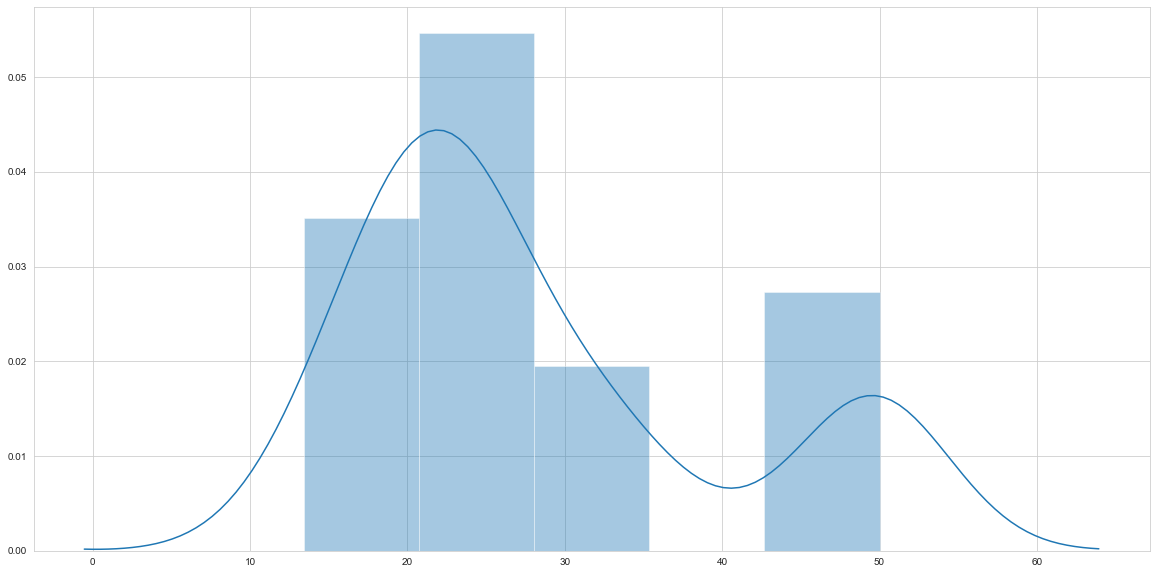

In [49]:
#Distribution plot of house values bordering the Charles River
sns.set_style("whitegrid")
sns.distplot(x1)

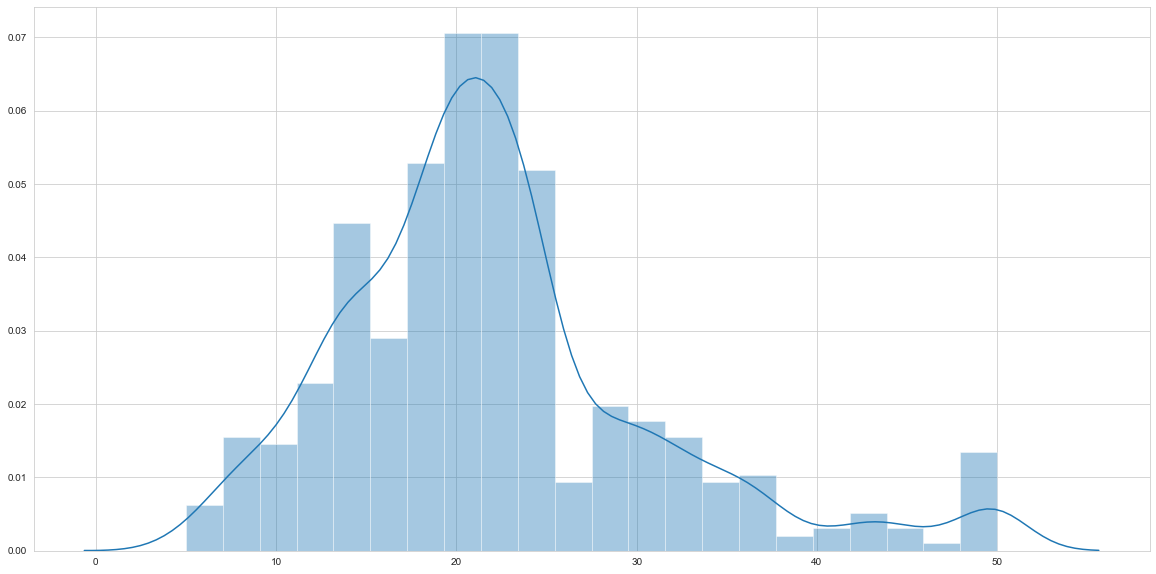

In [50]:
#Distribution plot of house values which do not border the Charles river
sns.distplot(y1)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


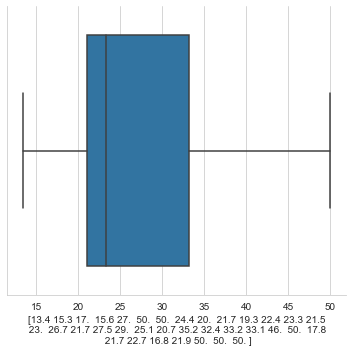

In [51]:
sns.catplot(x1, kind="box", data=df)

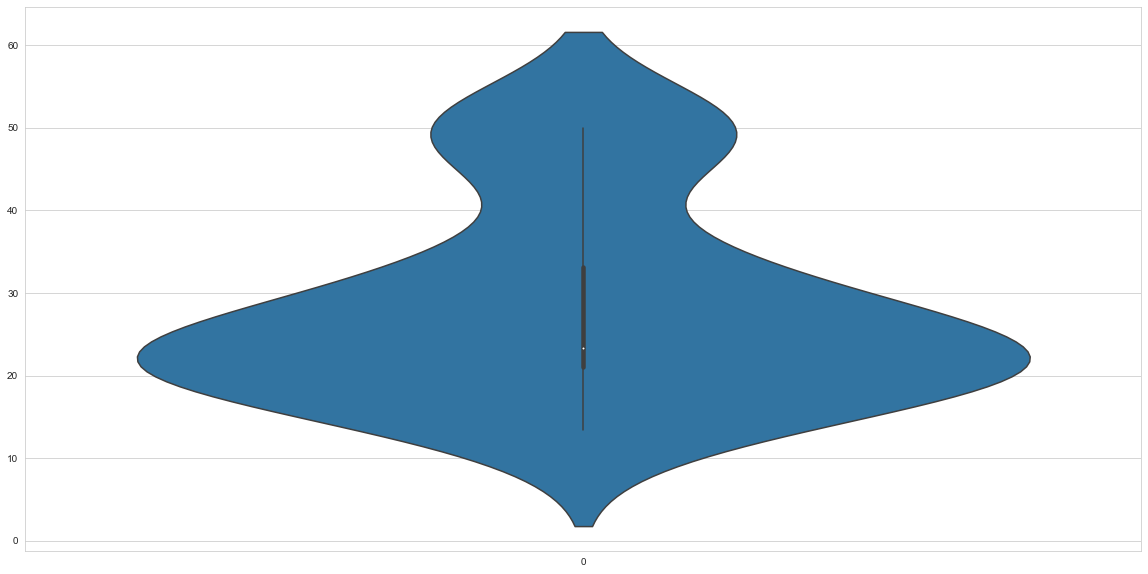

In [52]:
sns.violinplot(data=x1)

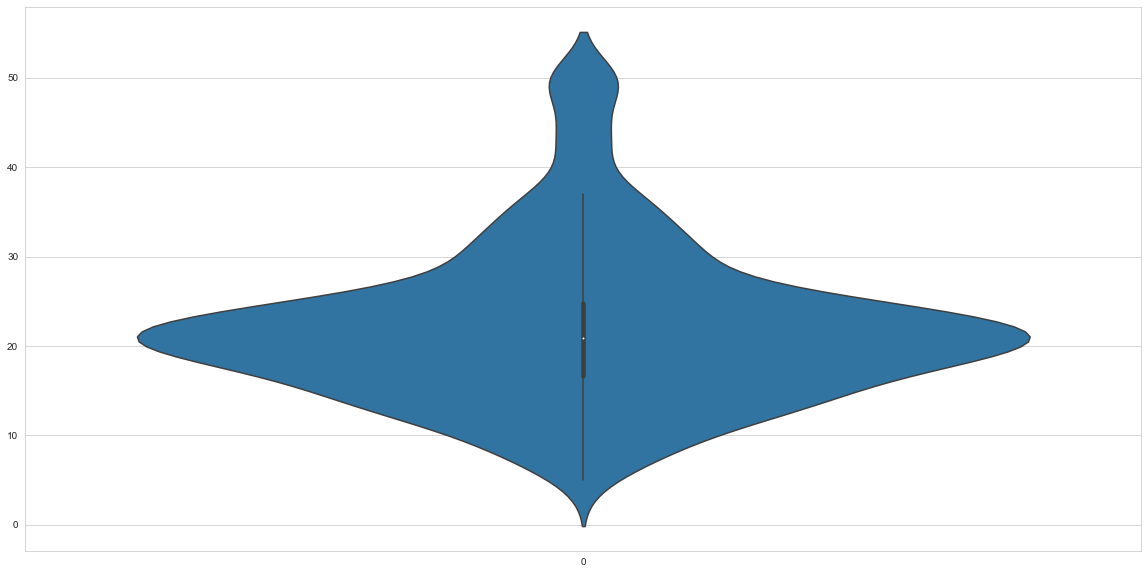

In [53]:
sns.violinplot(data=y1)

# T-Test using Anova

In [54]:
#T-Test using Anova
stats.f_oneway(x1, y1)

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

(array([0.009908  , 0.02547771, 0.03632932, 0.06794055, 0.03680113,
        0.01840057, 0.01226704, 0.00377448, 0.00471809, 0.00660533]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

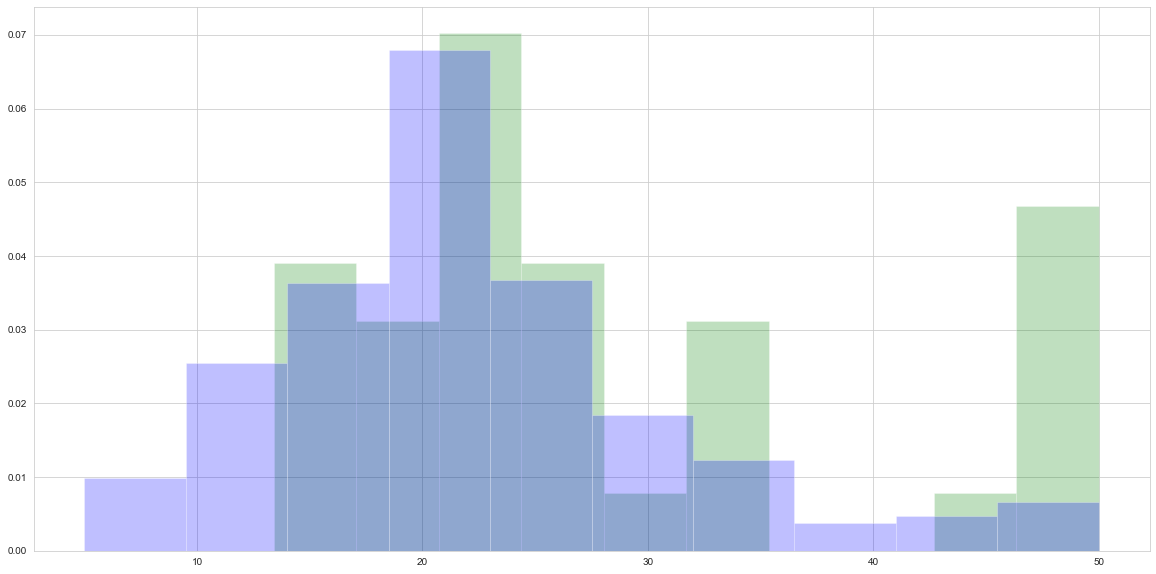

In [55]:
#Lets plot the results
x = np.linspace(1.25, 2.25, 1000)

pdfA = stats.norm.pdf(x1)
pdfB = stats.norm.pdf(y1)

#plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
#plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

plt.hist(x1, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(y1, density=True, color='b', alpha=0.25, label="Sample B")

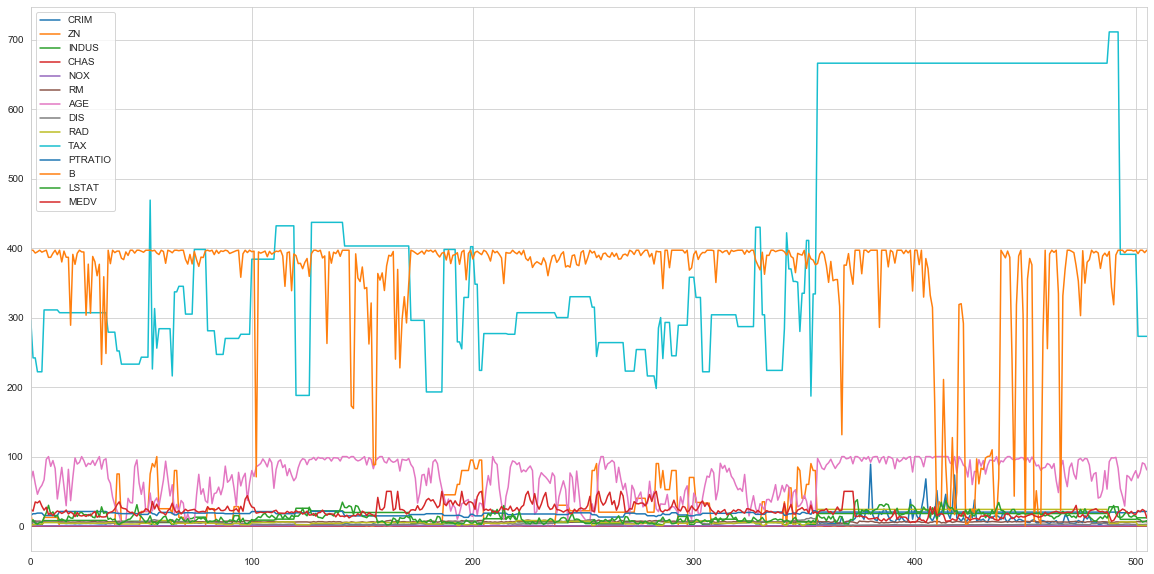

In [56]:
df.plot()

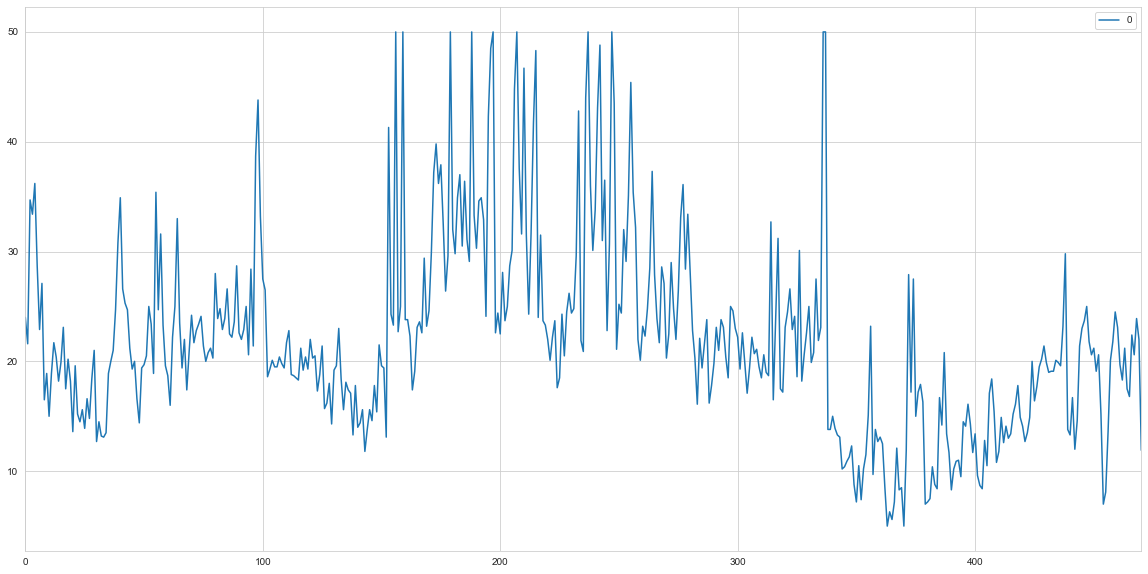

In [57]:
df = pd.DataFrame(y1)
df.plot()

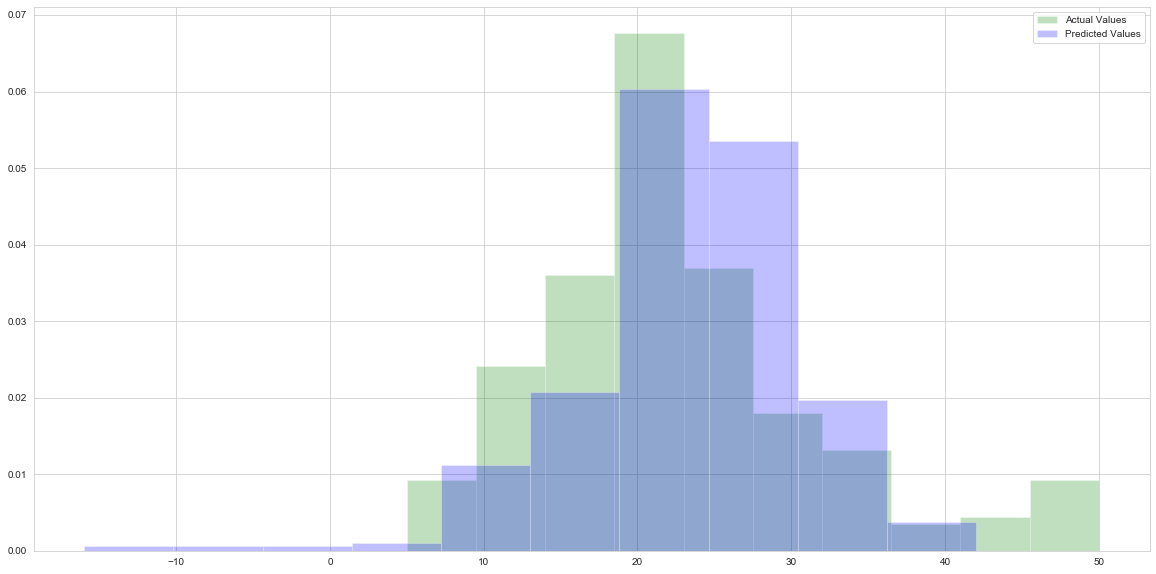

In [103]:
plt.hist(output, density=True, color='g', alpha=0.25, label="Actual Values")
plt.hist(m.predict(inputs), density=True, color='b', alpha=0.25, label="Predicted Values")

plt.legend()

# Keras

In [58]:
# import libraries
import numpy as np
import pandas as pd
import keras as kr
# sklearn is used to perform the train test split of the data
from sklearn.model_selection import train_test_split
from sklearn import datasets


In [61]:
# import libraries
import numpy as np
import pandas as pd
import keras as kr
# sklearn is used to perform the train test split of the data
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [62]:
#Create a dataframe from the data set and add the feature names as column labels. 
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [64]:
df['MEDV'] = boston.target

In [65]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [81]:
#Set up our input variables. This includes all variables except the price
inputs = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [73]:
#Set up our output variable which is the median price
output = df['MEDV']
output

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [84]:
#Create our model with 13 inputs and a single output 
m = kr.models.Sequential()
m.add(kr.layers.Dense(10, input_dim= 13, activation="linear"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation="linear"))

In [85]:
m.compile(loss="mean_squared_error", optimizer="adam")

In [86]:
m.fit(inputs, output, epochs=10, batch_size=10)




Epoch 1/10





506/506 [==============================] - 0s 926us/step - loss: 6028.6635
Epoch 2/10
506/506 [==============================] - 0s 87us/step - loss: 301.6840
Epoch 3/10
506/506 [==============================] - 0s 77us/step - loss: 126.2269
Epoch 4/10
506/506 [==============================] - 0s 71us/step - loss: 120.8350
Epoch 5/10
506/506 [==============================] - 0s 77us/step - loss: 115.4535
Epoch 6/10
506/506 [==============================] - 0s 75us/step - loss: 110.1779
Epoch 7/10
506/506 [==============================] - 0s 87us/step - loss: 103.4620
Epoch 8/10
506/506 [==============================] - 0s 83us/step - loss: 101.7301
Epoch 9/10
506/506 [==============================] - 0s 73us/step - loss: 95.7571
Epoch 10/10
506/506 [==============================] - 0s 75us/step - loss: 93.1408


In [87]:
m.predict(inputs) 

array([[ 27.701668 ],
       [ 26.738441 ],
       [ 22.463829 ],
       [ 21.864006 ],
       [ 23.757057 ],
       [ 24.669487 ],
       [ 26.326591 ],
       [ 32.644127 ],
       [ 34.56417  ],
       [ 30.16581  ],
       [ 32.247353 ],
       [ 29.456413 ],
       [ 21.519585 ],
       [ 23.491463 ],
       [ 27.413994 ],
       [ 22.534142 ],
       [ 16.760551 ],
       [ 27.655754 ],
       [ 16.013649 ],
       [ 25.182487 ],
       [ 31.129189 ],
       [ 29.099586 ],
       [ 30.13816  ],
       [ 31.934502 ],
       [ 30.427513 ],
       [ 26.117607 ],
       [ 29.033623 ],
       [ 26.732582 ],
       [ 29.679451 ],
       [ 27.883919 ],
       [ 30.091606 ],
       [ 30.252815 ],
       [ 24.422173 ],
       [ 29.66549  ],
       [ 26.570427 ],
       [ 25.884117 ],
       [ 24.260277 ],
       [ 20.802681 ],
       [ 18.717003 ],
       [ 33.477898 ],
       [ 31.955666 ],
       [ 11.935662 ],
       [ 12.817071 ],
       [ 13.340051 ],
       [ 19.718391 ],
       [ 1

In [89]:
output.as_matrix 

<bound method NDFrame.as_matrix of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64>

In [90]:
m.predict(inputs).T - output.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 3.70166779e+00,  5.13844147e+00, -1.22361710e+01,
        -1.15359940e+01, -1.24429428e+01, -4.03051300e+00,
         3.42659149e+00,  5.54412689e+00,  1.80641708e+01,
         1.12658096e+01,  1.72473526e+01,  1.05564133e+01,
        -1.80415344e-01,  3.09146271e+00,  9.21399384e+00,
         2.63414154e+00, -6.33944855e+00,  1.01557541e+01,
        -4.18635101e+00,  6.98248749e+00,  1.75291885e+01,
         9.49958649e+00,  1.49381607e+01,  1.74345016e+01,
         1.48275131e+01,  1.22176071e+01,  1.24336227e+01,
         1.19325821e+01,  1.12794510e+01,  6.88391876e+00,
         1.73916061e+01,  1.57528152e+01,  1.12221725e+01,
         1.65654892e+01,  1.30704269e+01,  6.98411713e+00,
         4.26027679e+00, -1.97319031e-01, -5.98299713e+00,
         2.67789764e+00, -2.94433441e+00, -1.46643377e+01,
        -1.24829290e+01, -1.13599493e+01, -1.48160858e+00,
        -3.16609192e-01, -6.18675232e-01,  1.28406815e+01,
         1.87003189e+01,  5.55468903e+00,  6.54436188e+0

In [91]:
m.predict(inputs).T - output.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


213.01656731280855

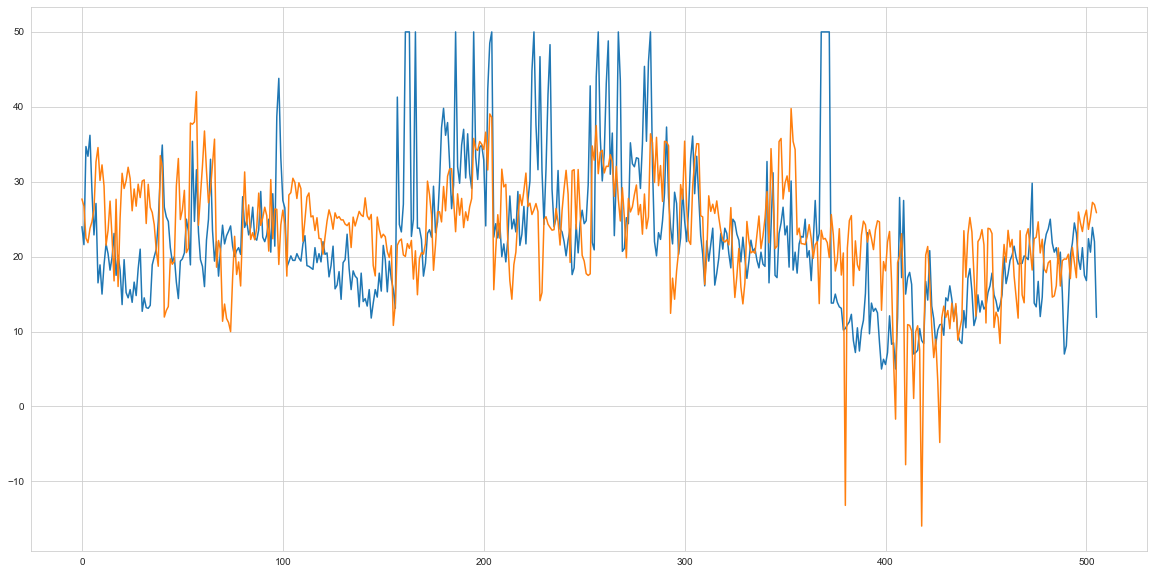

In [100]:
plt.plot(output)
plt.plot(m.predict(inputs))

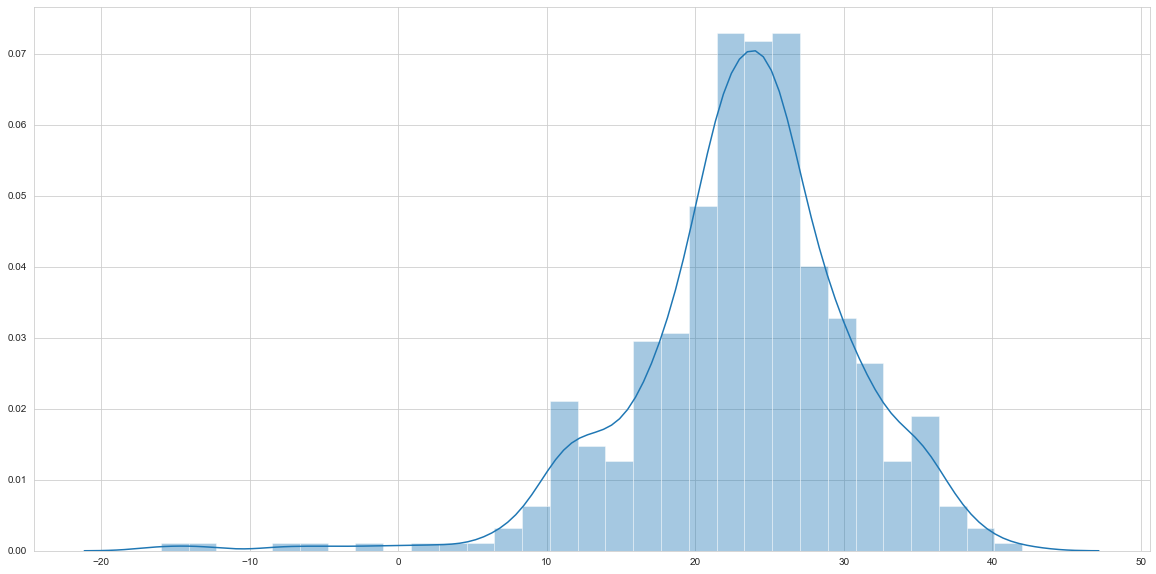

In [95]:
sns.distplot(m.predict(inputs))

In [59]:
#Importing Dataser
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape}')
print(f'Training sample : {train_data[0]}')
print(f'Training target sample : {train_targets[0]}')

Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : 15.2


In [5]:
#Feature Normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [6]:
#Building our model abd adding layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

In [ ]:
#k-fold Validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
#view scores
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

In [ ]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

In [ ]:
# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] 
maxPrice = train["price"].max()
trainY = train["price"] / maxPrice
testY = test["price"] / maxPrice

In [ ]:
# process the house attributes data by performing min-max scaling
print("[INFO] processing data...")
(trainX, testX) = datasets.process_house_attributes(df, train, test)

In [1]:
# process the house attributes data by performing min-max scaling
print("[INFO] processing data...")
(trainX, testX) = datasets.process_house_attributes(df, train, test)

[INFO] processing data...


NameError: name 'datasets' is not defined